# Importing the libraries and Data 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
data=pd.read_excel('C:/Users/sadhv/OneDrive/Desktop/TSAssignment/data.xlsx')#importing the file
data.info()#Summary of the time series
data.head()#top 5 rows of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2435 non-null   datetime64[ns]
 1   Cost    2435 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 38.2 KB


,Date,Cost
0,2015-01-01,4167
1,2015-01-02,4291
2,2015-01-03,4294
3,2015-01-04,4287
4,2015-01-05,4499


# Anomaly Detection

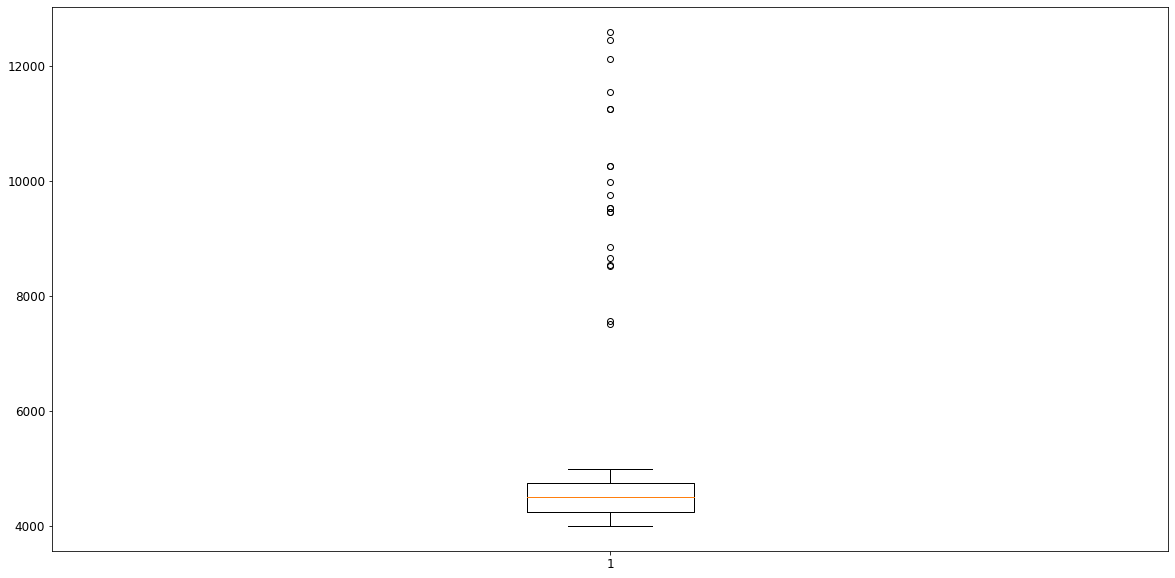

<Figure size 1440x720 with 0 Axes>

The given data is anomalous


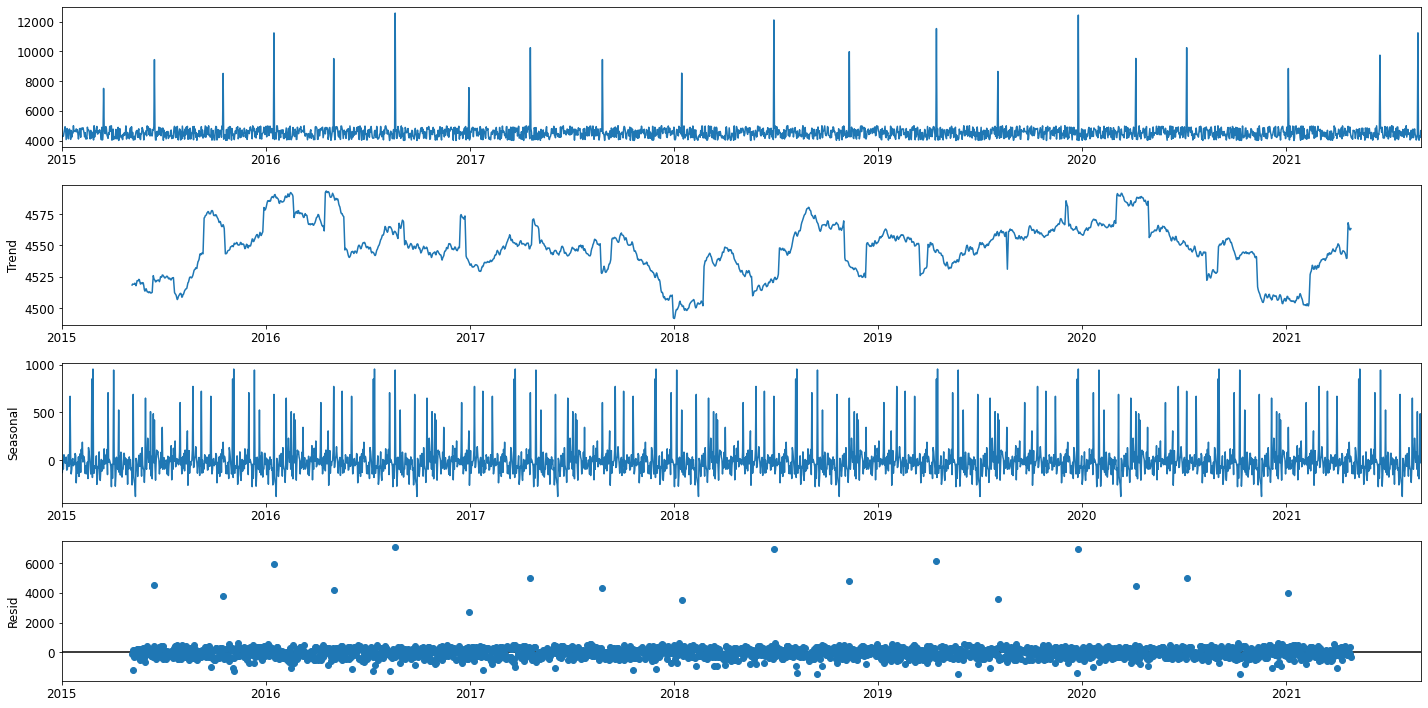

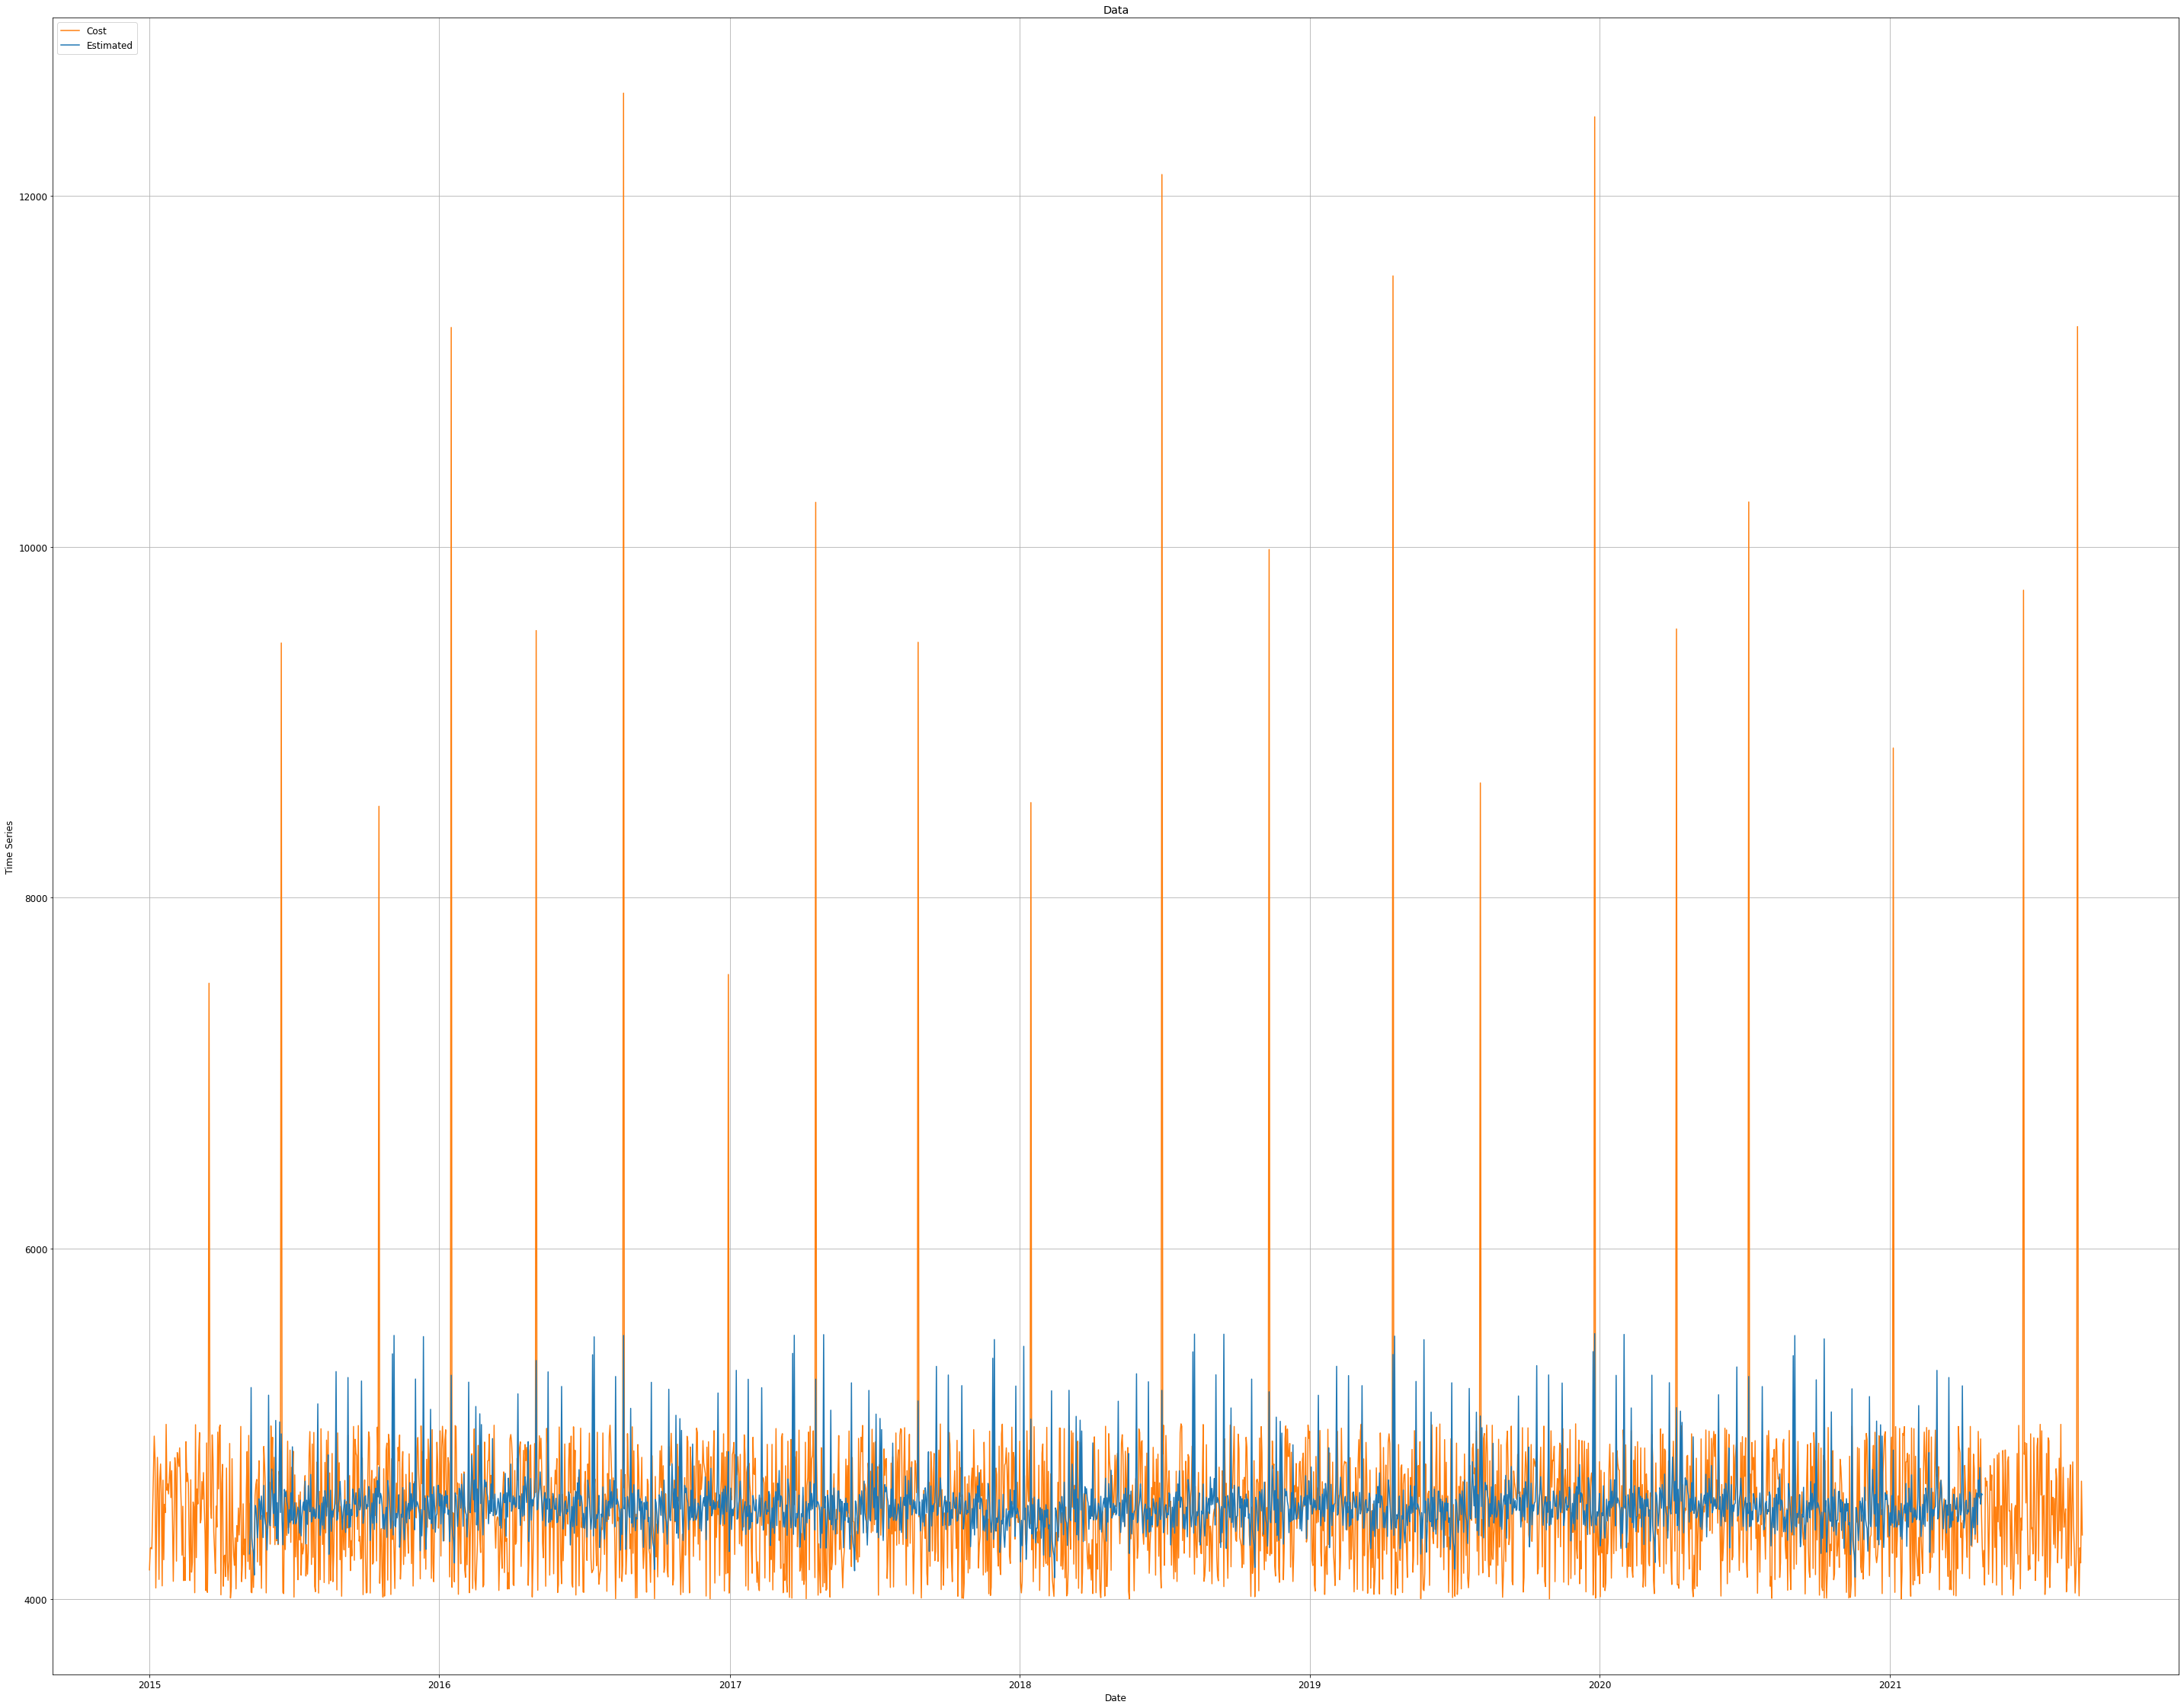

In [5]:
def anomaly_det(data):#Defining a function that accepts a univariate time series
    data=data.dropna()#In case new data has null values
    plt.boxplot(data.iloc[:,1])#Plotting a boxplot of timeseries to deduce outliers
    fig = plt.figure(figsize =(20, 10))#Change the default size of the figure
    plt.show()#to display the boxplot
    data1 = data.sort_values(data.columns[1])#Sorting the time series value
    Q3=np.percentile(data1.iloc[:,1], 75)#Calculating third Quartile
    Q1 = np.percentile(data1.iloc[:,1],25)#Calculating the first Quartile
    IQR = Q3 - Q1 #InterQuartile Range
    low_lim = Q1 - 1.5 * IQR 
    up_lim = Q3 + 1.5 * IQR
    Outliers=[]
    for i in range(0,data.shape[0]):
        if ((data.iloc[i,1]>up_lim) or (data.iloc[i,1]<low_lim)):#Values in the 2nd column(Cost say) that lies below lower limit and above upper limit identify as an outlier
               Outliers.append(data.iloc[i,1])
    from pylab import rcParams
    rcParams['figure.figsize']=20,10
    data=data.set_index(data.columns[0])#Setting the date or 1st column (Timestamp in sany case as index) as the decomposition allows for only integral values
    decomposition=sm.tsa.seasonal_decompose(data,period=252)#Decomposing  a time series into deterministic components(trend,seasonality )
    fig=decomposition.plot()#Plotting the components individually
    Trend,Seasonal,Residue=decomposition.trend,decomposition.seasonal,decomposition.resid#Extracting each of the components
    estimated = Trend + Seasonal#The  time series without residual i.e. assuming their is no anomaly in the data
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(50,40))# Specifying how  lines should look
    ax.plot(data.index.values, data, color='tab:orange', label='Cost')
    ax.plot(data.index.values,estimated,color='tab:blue',label='Estimated')#Plotting the actual and estimated(without residual) to visualise the large residuals
    ax.set_xlabel('Date')
    ax.set_ylabel('Time Series')
    ax.set_title('Data')
    ax.grid(True)
    ax.legend(loc='upper left');
    resid_mu = Residue.mean()#Mean and standard Deviation of the Residual
    resid_dev =Residue.std()
    lower = resid_mu - 3*resid_dev
    upper = resid_mu + 3*resid_dev#Looking for the confidence interval 
    anomalies = data[(Residue < lower) | (Residue > upper)]# Storing  the values of the residual which lie outside the confidence interval in another variable 
    if (len(anomalies)>0 or len(Outiers)>0):
        print("The given data is anomalous")
    else:
        print("Not Anomalous")
anomaly_det(data)#Calling the function

# Example data

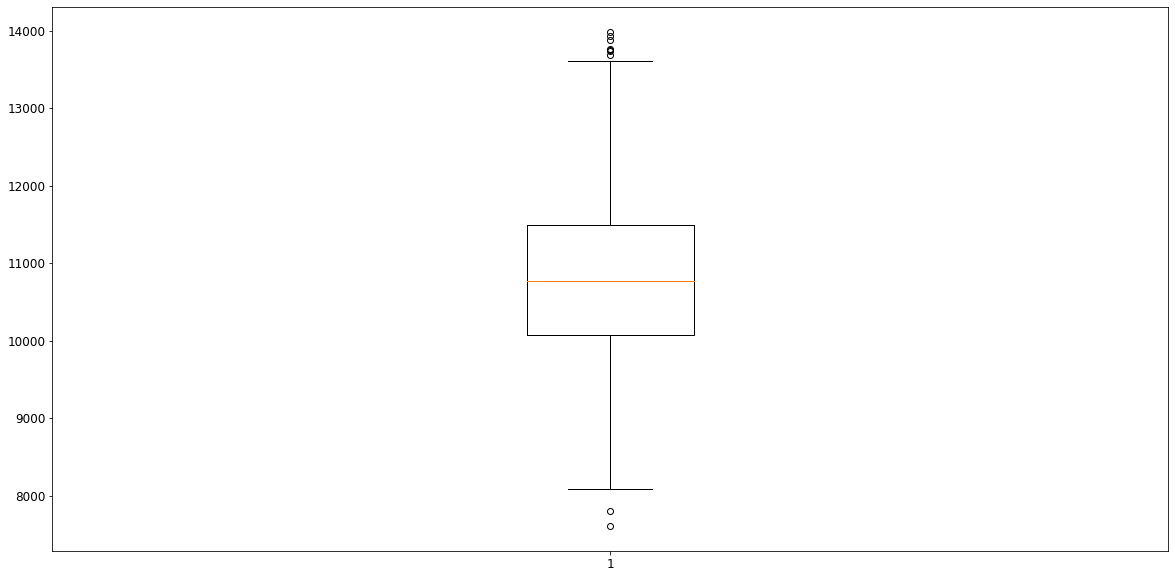

<Figure size 1440x720 with 0 Axes>

The given data is anomalous


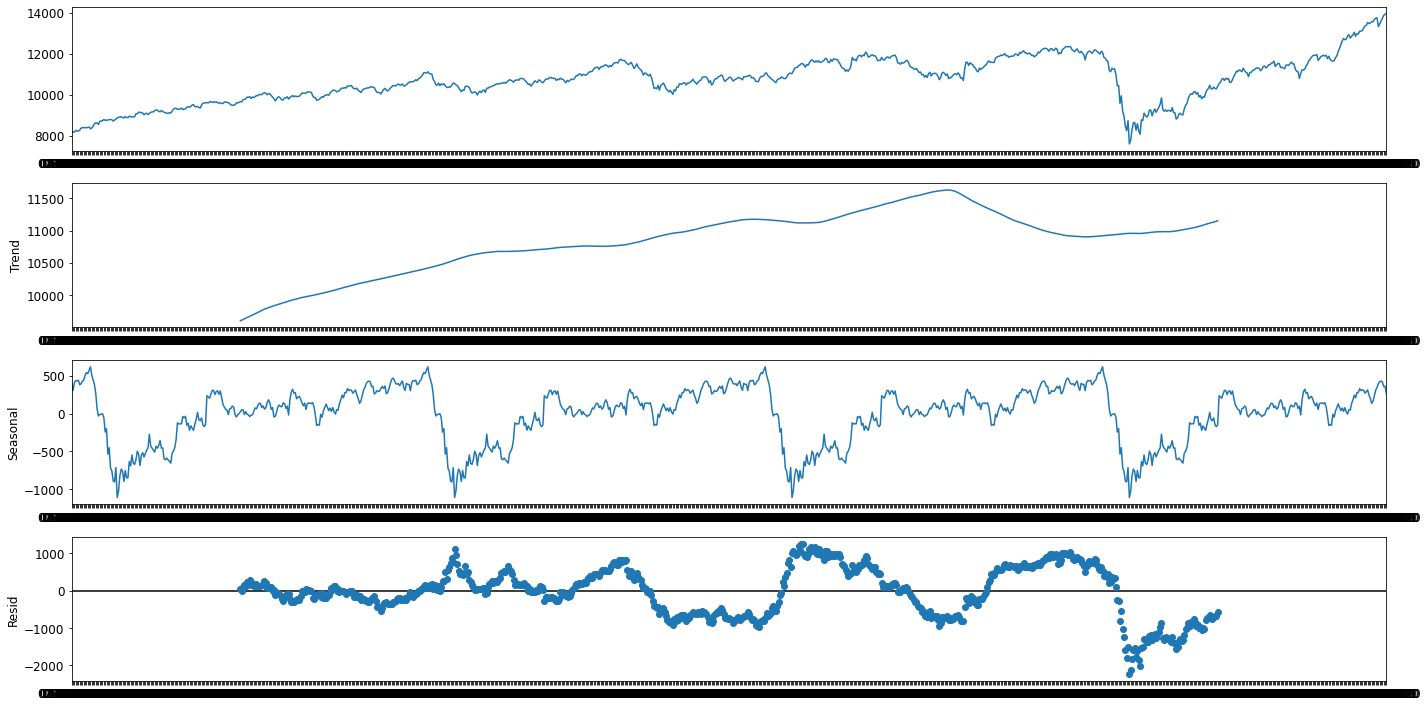

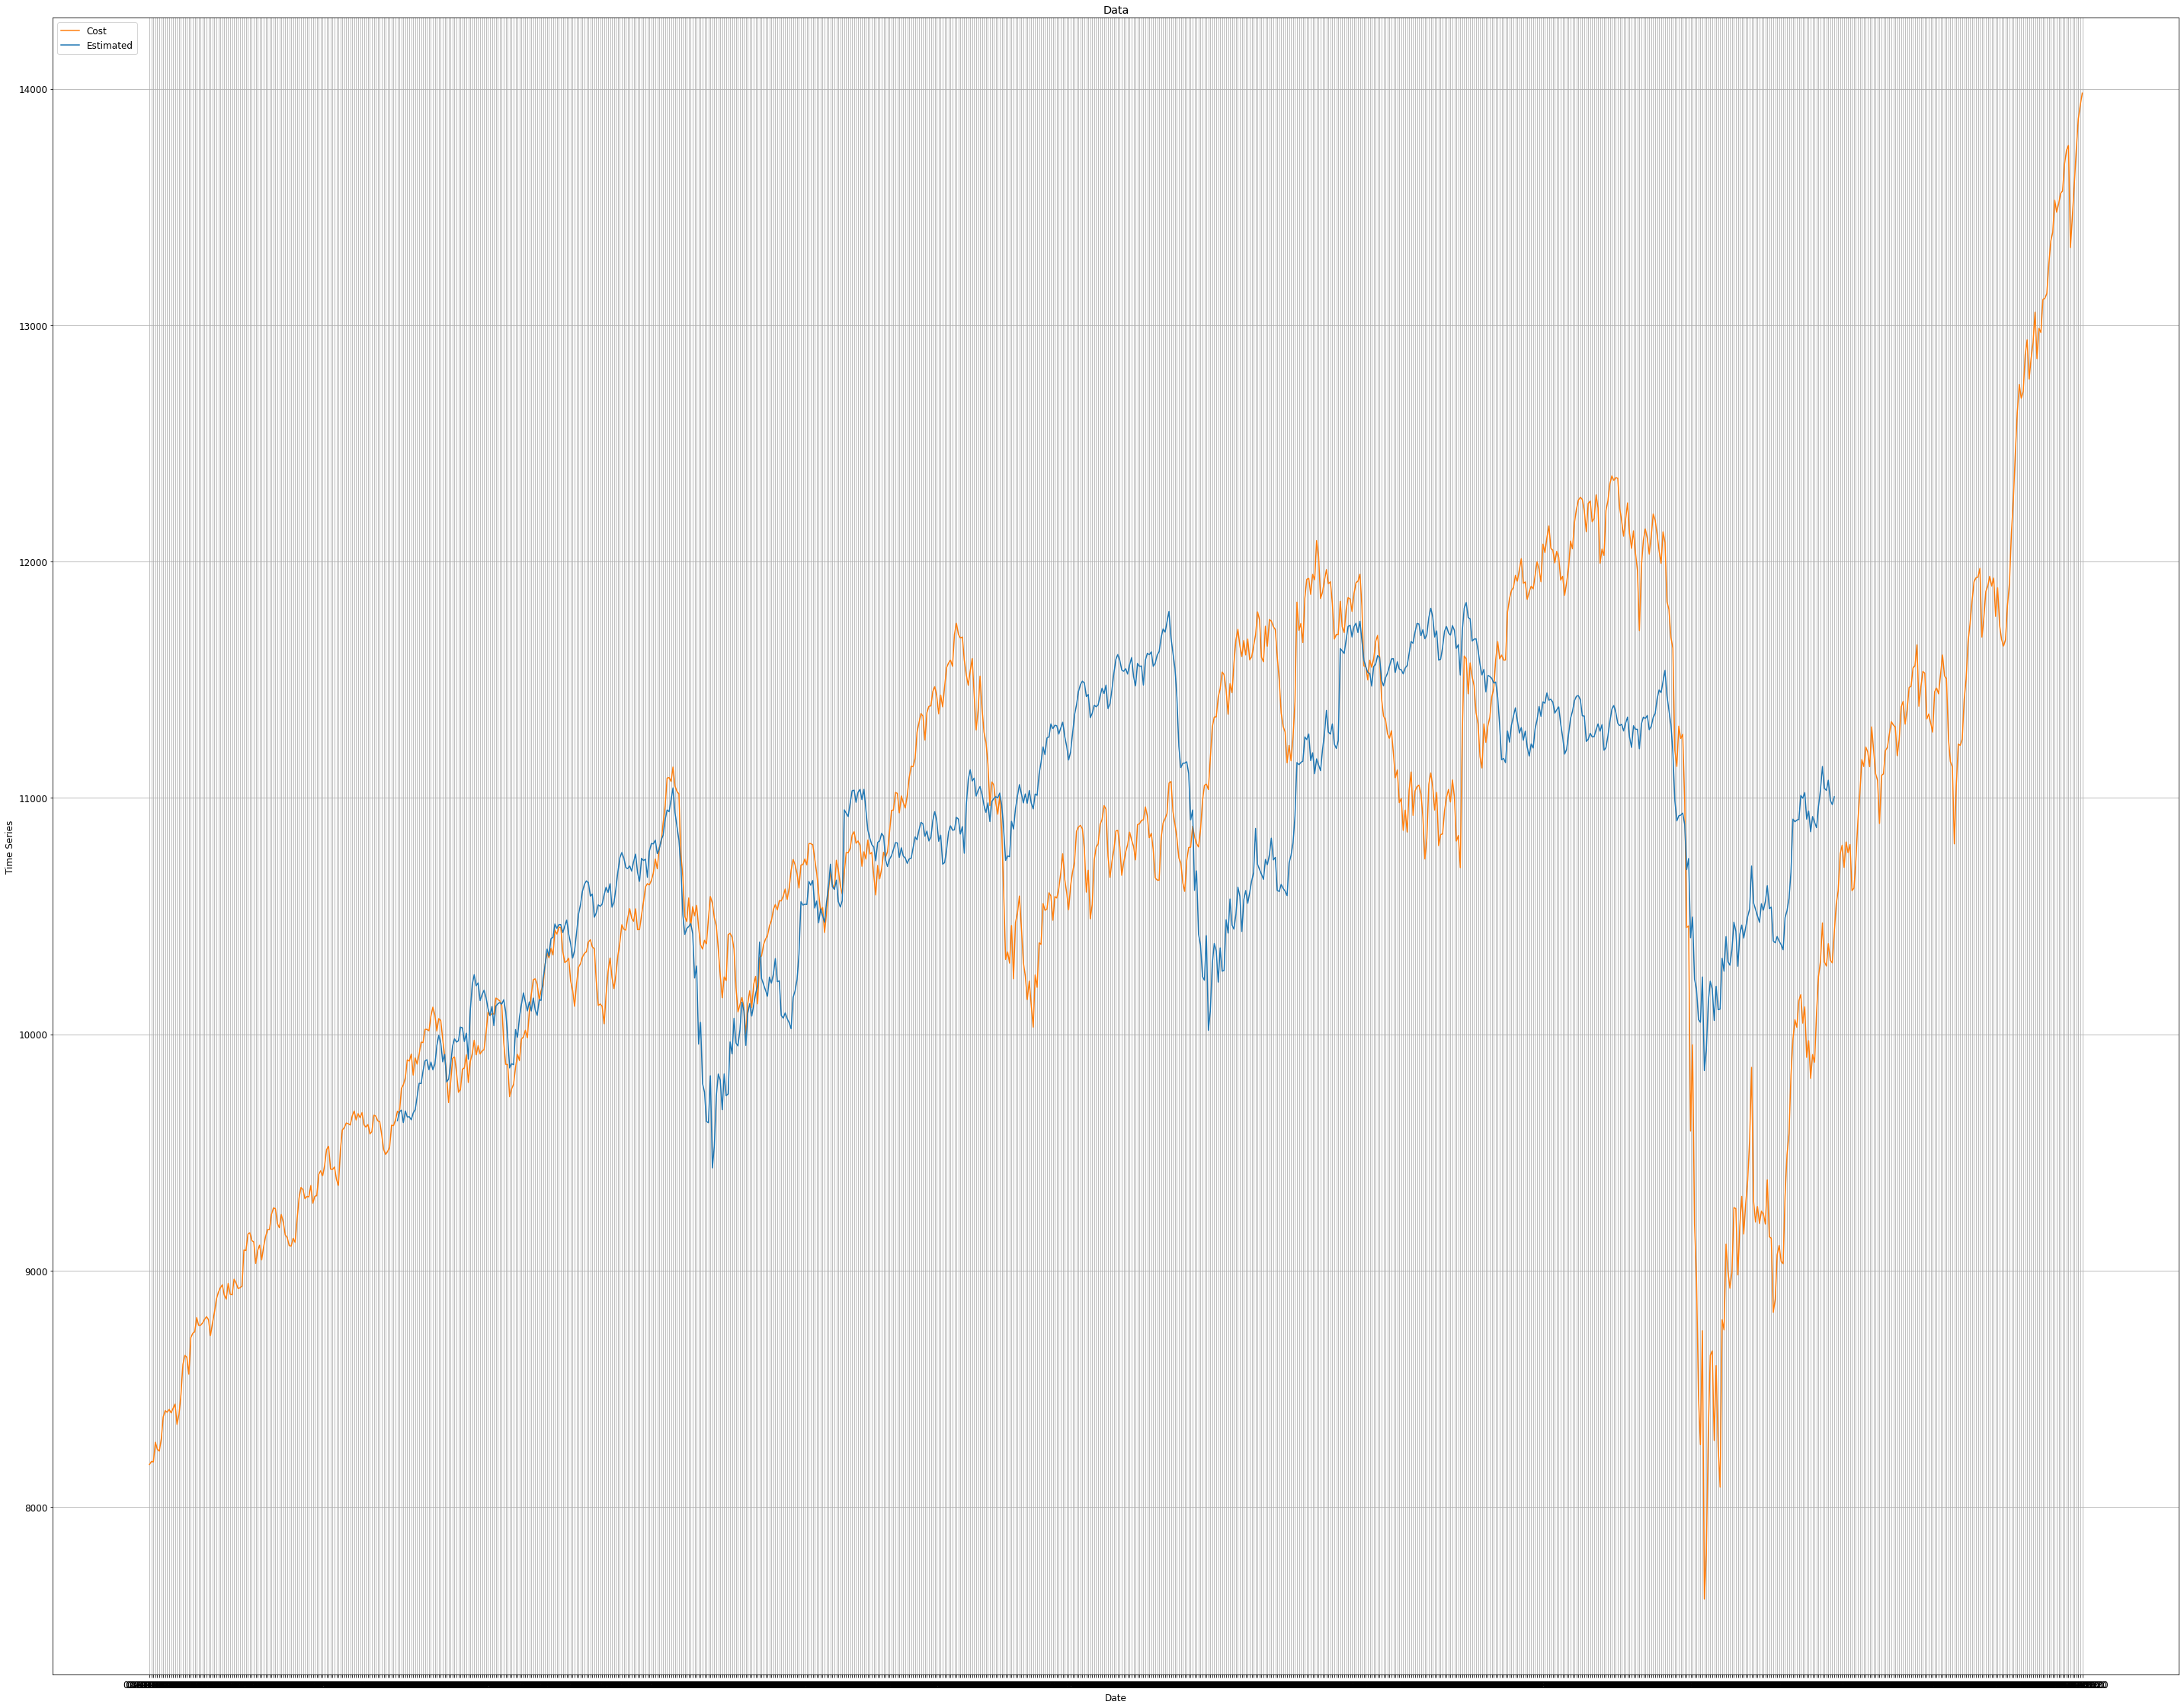

In [6]:
NSE=pd.read_csv('C:/Users/sadhv/OneDrive/Desktop/Dissertation/NIFTY5.csv')#To check for the correctness of algorithm
anomaly_det(NSE)
